In [4]:
import pandas as pd
df = pd.read_excel("/Users/ms/Downloads/pnlclean.xlsx")


In [9]:

df.columns

Index(['Symbol', 'Quantity', 'Buy Value', 'Sell Value', 'Realized P&L',
       'Realized P&L Pct.', 'Previous Closing Price', 'Open Quantity',
       'Open Quantity Type', 'Open Value', 'Unrealized P&L',
       'Unrealized P&L Pct.'],
      dtype='object')

In [10]:
df.head()

,Symbol,Quantity,Buy Value,Sell Value,Realized P&L,Realized P&L Pct.,Previous Closing Price,Open Quantity,Open Quantity Type,Open Value,Unrealized P&L,Unrealized P&L Pct.
0,BANKNIFTY2361543400PE,25,832.50,1000.0,167.50,20.1201,0.0,0,NaN,0,0.0,0.0
1,BANKNIFTY2361543500PE,100,5445.00,5647.5,202.50,3.7190,0.0,0,NaN,0,0.0,0.0
2,BANKNIFTY2361543600PE,50,2793.75,3630.0,836.25,29.9329,0.0,0,NaN,0,0.0,0.0
3,BANKNIFTY2361543700PE,100,7727.50,7572.5,-155.00,-2.0058,0.0,0,NaN,0,0.0,0.0
4,BANKNIFTY2361543800PE,25,1725.00,3022.5,1297.50,75.2174,0.0,0,NaN,0,0.0,0.0


In [11]:
df['Realized P&L'].sum()

np.float64(70932.75)

In [44]:
#  Calculate Win Rate %
total_trades = len(df)
win_rate = (len(winning_trades) / total_trades) * 100
print(f"Win Rate: {win_rate:.2f}%")

Win Rate: 57.69%


In [14]:
# Top Profits
grouped = df.groupby('Symbol')        
pnl_sum = grouped['Realized P&L'].sum()  
pnl_sum.sort_values(ascending=False).head(10)

Symbol
BANKNIFTY23OCT42800PE    8027.25
BANKNIFTY23D0645000CE    6286.50
BANKNIFTY24JAN45600PE    5661.75
BANKNIFTY24JAN45700PE    4240.50
BANKNIFTY23AUG44400PE    4209.00
BANKNIFTY23N2244000PE    3956.25
BANKNIFTY23OCT43500PE    3844.50
BANKNIFTY2430646700CE    3654.75
BANKNIFTY23O0444200PE    3499.50
BANKNIFTY23SEP44500PE    3177.00
Name: Realized P&L, dtype: float64

In [15]:
df.groupby('Symbol')['Realized P&L'].sum().sort_values().head(10)  # Biggest Losses

Symbol
BANKNIFTY2421444500PE   -4047.75
BANKNIFTY2431348200CE   -4044.00
BANKNIFTY2430645700PE   -4015.50
BANKNIFTY23D2048100CE   -3924.75
BANKNIFTY24MAR45800PE   -3552.75
BANKNIFTY2421445900CE   -3015.00
BANKNIFTY2411748300CE   -2635.50
BANKNIFTY23O1844800CE   -2510.25
BANKNIFTY2430647700CE   -2382.75
BANKNIFTY2372045500PE   -2372.50
Name: Realized P&L, dtype: float64

In [17]:
import matplotlib.pyplot as plt 


<Axes: title={'center': 'Top 10 Profitable Symbols'}, xlabel='Symbol'>

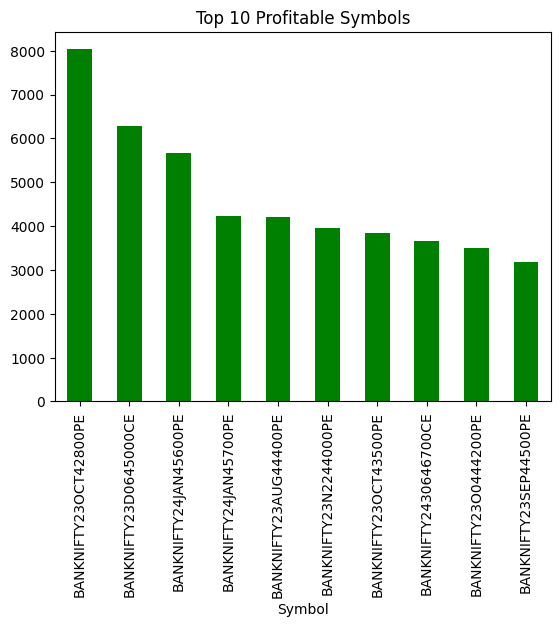

In [25]:
# Group data by Symbol and calculate total profit/loss for each
pnl_sum = df.groupby('Symbol')['Realized P&L'].sum()

# Sort by top profits (descending) and take top 10
top_profits = pnl_sum.sort_values(ascending=False).head(10)

# Plot a bar chart
top_profits.plot(kind='bar', color='green', title='Top 10 Profitable Symbols')

# I have made the most profit in the put(PE) option, which signifies I am more comfortable when the market is falling 



Winning Trades: 150
Losing Trades: 108


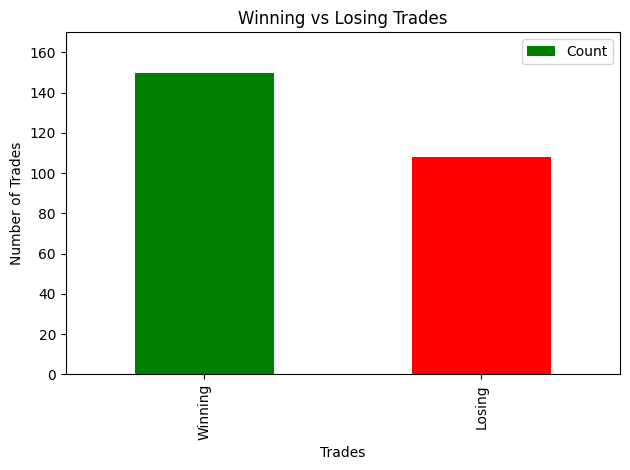

In [46]:
#  Count winning and losing trades
winning_count = (df['Realized P&L'] > 0).sum()
losing_count = (df['Realized P&L'] < 0).sum()

#  Create a DataFrame for plotting
trade_outcomes = pd.DataFrame({
    'Trades': ['Winning', 'Losing'],
    'Count': [winning_count, losing_count]
})
# Count how many wins and losses
print("Winning Trades:", len(winning_trades))
print("Losing Trades:", len(losing_trades))

#  Plot the bar chart
trade_outcomes.plot(kind='bar', x='Trades', y='Count', color=['green', 'red'], title='Winning vs Losing Trades')
plt.ylim(0, max(trade_outcomes['Count']) + 20)

#  Customize chart
plt.ylabel('Number of Trades')
plt.tight_layout()
plt.show()







In [32]:
avg_win = df[df['Realized P&L'] > 0]['Realized P&L'].mean()    #Average Profit of Winning Trades
print(f"📈 Average Profit (Winning Trades): {avg_win:.2f}")

avg_loss = df[df['Realized P&L'] < 0]['Realized P&L'].mean()
print(f"Average Loss (Losing Trades): ₹{avg_loss:.2f}\n This indicates that I need to work on improving my risk-reward ratio.")     #Average Loss of Losing Trades

📈 Average Profit (Winning Trades): 1023.23
📉 Average Loss (Losing Trades): -764.36


In [40]:
#Average Profit of Winning Trades
avg_win = df[df['Realized P&L'] > 0]['Realized P&L'].mean()
print(f"Average Profit :{avg_win:.2f}")

#Average Loss of Losing Trades
avg_loss = df[df['Realized P&L'] < 0]['Realized P&L'].mean()
print(f"Average Loss : ₹{avg_loss:.2f}\nThis indicates that I need to work on improving my risk-reward ratio.")

Average Profit :1023.23
Average Loss : ₹-764.36
This indicates that I need to work on improving my risk-reward ratio.


In [41]:
df.head(1)

,Symbol,Quantity,Buy Value,Sell Value,Realized P&L,Realized P&L Pct.,Previous Closing Price,Open Quantity,Open Quantity Type,Open Value,Unrealized P&L,Unrealized P&L Pct.
0,BANKNIFTY2361543400PE,25,832.5,1000.0,167.5,20.1201,0.0,0,NaN,0,0.0,0.0


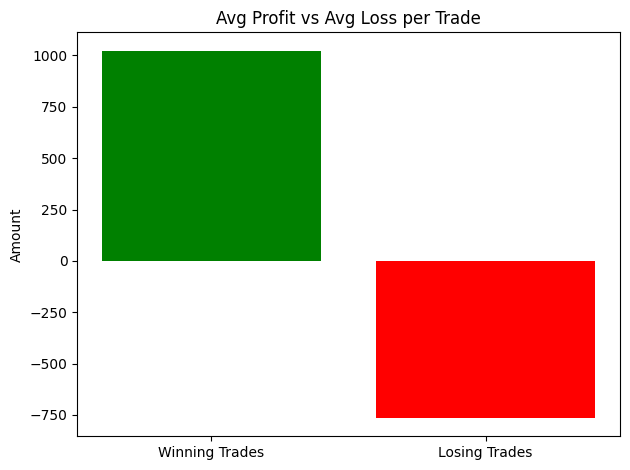

In [39]:
plt.bar(['Winning Trades', 'Losing Trades'], [avg_win, avg_loss], color=['green', 'red'])
plt.title('Avg Profit vs Avg Loss per Trade')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

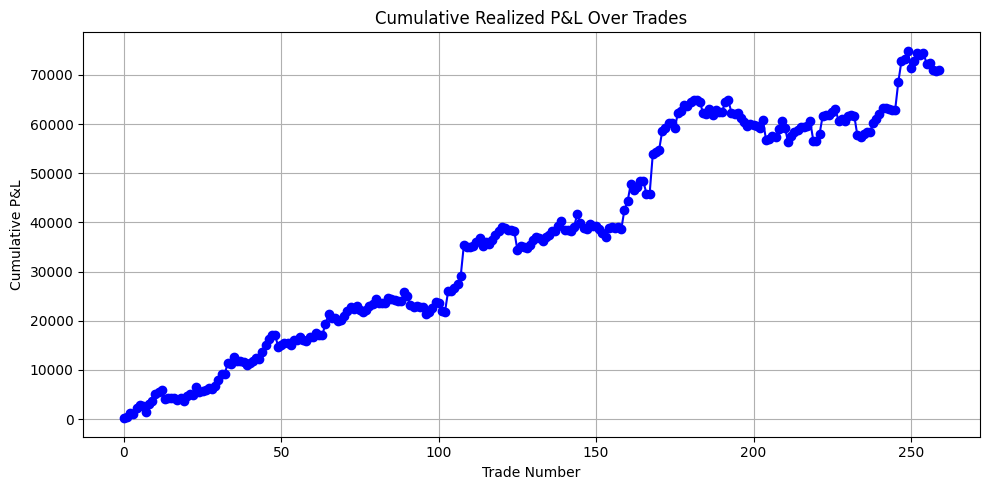

In [43]:
df['Cumulative P&L'] = df['Realized P&L'].cumsum()
plt.figure(figsize=(10, 5))
plt.plot(df['Cumulative P&L'], marker='o', linestyle='-', color='blue')
plt.title('Cumulative Realized P&L Over Trades')
plt.xlabel('Trade Number')
plt.ylabel('Cumulative P&L')
plt.grid(True)
plt.tight_layout()
plt.show()